# Regression Modeling

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

## Data Loading

In [3]:
df = pd.read_csv('./data/cleaned_universities.csv')

In [4]:
df.head()

,in-state tuition,out-of-state tuition,new_student_top_10,new_student_top_25,new_student_enrolled,room,board,% fac. w/PHD,student_faculty_ratio,school_type,full_time_undergrad,part_time_undergrad,estim. book costs,estim. personal $,Graduation rate
0,7560.0,7560.0,16.0,44.0,55.0,1620.0,2500.000000,76.0,11.9,Private,249.0,869.0,800.0,1500.000000,15.0
1,1742.0,5226.0,4.0,24.0,89.0,2514.0,2250.000000,39.0,9.5,Public,492.0,1849.0,500.0,1162.000000,39.0
2,1700.0,3400.0,0.0,0.0,984.0,1108.0,1442.000000,53.0,14.3,Public,3958.0,305.0,500.0,850.000000,40.0
3,5600.0,5600.0,0.0,27.0,179.0,1550.0,1700.000000,52.0,32.8,Private,1367.0,578.0,350.0,1321.797862,55.0
4,2220.0,4440.0,18.0,78.0,570.0,2160.0,2036.312162,72.0,18.9,Public,2385.0,331.0,300.0,600.000000,51.0


In [5]:
df['school_type'] = df['school_type'].astype("category")
# converts the school_type column to a cateogry dtype

In [6]:
df['school_type_codes'] = df['school_type'].cat.codes
# makes numerical codes for each school type
# 0 = private
# 1 = public

<Axes: >

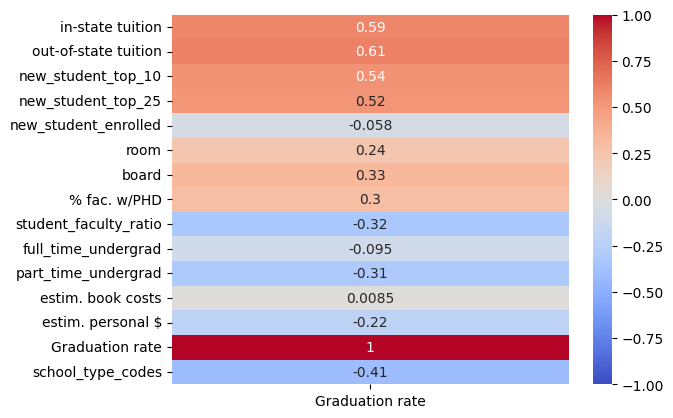

In [7]:
sns.heatmap(df.corr(numeric_only=True)[['Graduation rate']],
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)
# makes a heatmap to visualize the correlations to graduation rate

In [8]:
X = df.drop(columns=['school_type', 'Graduation rate'])
# independant features
y = df['Graduation rate']
# dependant feature

In [9]:
r2_scores = []
rmse_scores = []
for i in np.arange(0.2, 0.4, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    # splits data to training and testing data, using the specified test size as the split point. 
    lr = LinearRegression()
    # instantilizes linear regression model
    rf = RandomForestRegressor()
    # instantializes random forest model
    lr.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    # trains the models
    r2_score = {'Linear Regression': lr.score(X_test, y_test), 
               'Random Forest': rf.score(X_test, y_test),
               'Test Size': i}
    # log the score for r2
    lr_preds = lr.predict(X_test)
    rf_preds = rf.predict(X_test)
    # make predicitons with each model
    lr_rmse = root_mean_squared_error(y_test, lr_preds)
    rf_rmse = root_mean_squared_error(y_test, rf_preds)
    # get the rmse score for each model
    baseline_preds = np.full_like(y_test, y_test.mean())
    baseline_rmse = root_mean_squared_error(y_test, baseline_preds)
    # get the baseline rmse (predicts mean every time) to compare out model scores. 
    rmse_score = {
        'Linear Regression': lr_rmse,
        'Random Forest': rf_rmse,
        'Baseline': baseline_rmse,
        'Test Size': i
    }
    # log the rmse scores
    r2_scores.append(r2_score)
    # save the r2 scores
    rmse_scores.append(rmse_score)
    # save the rmse scores. 

In [10]:
r2_df = pd.DataFrame(r2_scores)
# makes a dataframe from the r2 scores

In [11]:
r2_df.sort_values(by='Linear Regression', ascending=False)
# sorts the r2 scores descending for linear regression

,Linear Regression,Random Forest,Test Size
0,0.567699,0.585111,0.20
3,0.548874,0.565331,0.23
1,0.540463,0.578730,0.21
2,0.538475,0.573609,0.22
4,0.534643,0.539579,0.24
7,0.531491,0.560231,0.27
5,0.526660,0.560011,0.25
6,0.525184,0.542012,0.26
11,0.523496,0.537587,0.31
9,0.523275,0.546406,0.29


In [12]:
r2_df.sort_values(by='Random Forest', ascending=False)
# sorts the r2 scores descending for random forest

,Linear Regression,Random Forest,Test Size
0,0.567699,0.585111,0.20
1,0.540463,0.578730,0.21
2,0.538475,0.573609,0.22
3,0.548874,0.565331,0.23
7,0.531491,0.560231,0.27
5,0.526660,0.560011,0.25
8,0.522959,0.546612,0.28
9,0.523275,0.546406,0.29
6,0.525184,0.542012,0.26
4,0.534643,0.539579,0.24


In [13]:
rmse_df = pd.DataFrame(rmse_scores)
# makes a dataframe of the rmse scores

In [14]:
rmse_df.sort_values(by='Linear Regression', ascending=True)
# sorts the rmse scores ascending for linear regression

,Linear Regression,Random Forest,Baseline,Test Size
0,13.119966,12.853027,19.954436,0.20
11,13.346509,13.147688,19.334565,0.31
10,13.376742,13.268090,19.369578,0.30
12,13.383801,13.197779,19.261042,0.32
2,13.438168,12.916546,19.780742,0.22
18,13.439390,13.408919,19.078385,0.38
17,13.443980,13.343640,19.105520,0.37
16,13.445689,13.277552,19.157783,0.36
7,13.468775,13.049124,19.677467,0.27
15,13.470764,13.479350,19.249687,0.35


In [15]:
rmse_df.sort_values(by='Random Forest', ascending=True)
# sorts the rmse scores ascending for random forest

,Linear Regression,Random Forest,Baseline,Test Size
0,13.119966,12.853027,19.954436,0.20
2,13.438168,12.916546,19.780742,0.22
1,13.588137,13.010069,20.044697,0.21
7,13.468775,13.049124,19.677467,0.27
13,13.516928,13.137816,19.262511,0.33
11,13.346509,13.147688,19.334565,0.31
5,13.652207,13.162468,19.843415,0.25
12,13.383801,13.197779,19.261042,0.32
9,13.545997,13.213289,19.619013,0.29
3,13.495566,13.247113,20.092873,0.23


A test size of 0.20 had the best score in both R2 and RMSE in Random Forest, so we will use that to test in KNN regressor with different neighbor sizes. Baseline RMSE to beat is 19.95

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# splits the data 80/20 into training and test data

In [27]:
scores = []
for i in range(3, 30):
    knn = KNeighborsRegressor(n_neighbors=i)
    # creates a KNN regressor model with the specified number of neighbors
    knn.fit(X_train, y_train)
    # fits the model on the training data
    knn_preds = knn.predict(X_test)
    # makes predictions using the KNN model. 
    score = {'neighbors': i, 'r2': knn.score(X_test, y_test), 'rmse': root_mean_squared_error(y_test, knn_preds)}
    # logs the r2 and rmse scores
    scores.append(score)
    # adds the r2 and rmse scores

In [28]:
score_df=  pd.DataFrame(scores)
# makes a dataframe of the scores for KNN

In [29]:
score_df.sort_values(by='r2', ascending=False)
# sorts the scores by the r2 score

,neighbors,r2,rmse
17,20,0.493656,14.199151
18,21,0.491614,14.227744
9,12,0.490360,14.245292
19,22,0.490237,14.246999
16,19,0.486442,14.299941
20,23,0.486413,14.300343
14,17,0.484808,14.322667
25,28,0.484199,14.331135
11,14,0.483615,14.339239
22,25,0.483085,14.346601


The best performing model was Random Forest with a test size of 0.20, having an R2 score of 0.58, and an RMSE score of 12.85. 

This means that this model is able to explain ~58% of the variance of the graduation rate, and can accurately predict the graduation rate within 12.85%. 


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
rf.score(X_test, y_test)

0.5849455902694096

In [36]:
import pickle

In [39]:
# with open('model.pkl', 'wb') as file:
#     pickle.dump(rf, file)

# makes the pickle file for the model to load into. 
# this is commented out so it doesn't get replaced every time